In [177]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle


X1, label1 = pickle.load(open("dataset_1.pkl","rb"), encoding='latin1')
X2, label2 = pickle.load(open("dataset_2.pkl","rb"), encoding='latin1')

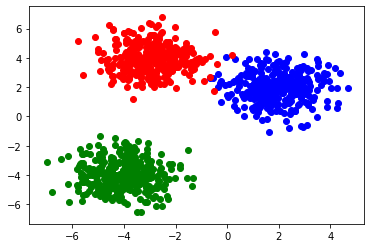

In [171]:
X1_1 = X1[np.where(label1 == 0)]
X1_2 = X1[np.where(label1 == 1)]
X1_3 = X1[np.where(label1 == 2)]


X2_1 = X2[np.where(label2 == 0)]
X2_2 = X2[np.where(label2 == 1)]
X2_3 = X2[np.where(label2 == 2)]
X2_4 = X2[np.where(label2 == 3)]
X2_5 = X2[np.where(label2 == 4)]

colors2 = ['red','green','blue','purple', 'yellow']
colors = ['red','green','blue']

plt.scatter(X1_1[:,0], X1_1[:,1], c='blue')
plt.scatter(X1_2[:,0], X1_2[:,1], c='red')
plt.scatter(X1_3[:,0], X1_3[:,1], c='green')
plt.show()

In [172]:
def get_closest(X, centroid):
    closestCen = np.zeros(len(X))
    for i in range(len(X)):
        closestCen[i] = np.argmin(np.sqrt((X[i,0] - centroid[:,0])**2 + (X[i,1] - centroid[:,1])**2))
    return closestCen

def compute_centroids(X, closestCen, centroid):
    newCentroid = np.zeros_like(centroid)
    for i in range(len(newCentroid)):
        d = X[np.where(closestCen == i)]  
        if len(d) > 0:
            newCentroid[i] = [np.mean(d[:,0]), np.mean(d[:,1])]
    return newCentroid      
def converge(centroid, newCentroid):
    if (newCentroid==centroid).all():
        return [True, 0]
        
    dist = 0
    for c, n in zip (centroid, newCentroid):        
        dist += np.sqrt((n[0] - c[0])**2 + (n[1] - c[1])**2)      
    
    return [True if dist == 0.0 else False, dist]

In [173]:
def kMean(X, K):
    centroid = X[np.random.choice(len(X), K)]
    print(centroid)
    finished = False
    convCrit = []
    while(not finished):
        closestCen = get_closest(X, centroid)
        newCentroid = compute_centroids(X, closestCen, centroid)
        conv = converge(centroid, newCentroid)
        finished = conv[0]
        centroid = newCentroid
        convCrit.append(conv[1])
    return centroid, convCrit, closestCen
    

## Ex 2

In [174]:
centroid, conv, class_ = kMean(X1, 3)

[[-1.38194573  3.17559088]
 [-3.95992854 -4.32775492]
 [ 3.95591231  2.39009332]]


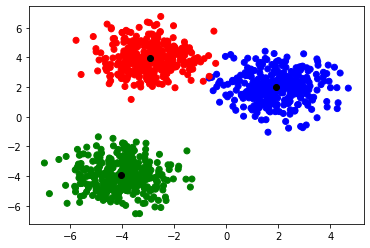

In [178]:
plt.scatter(X1[:,0], X1[:,1], c=class_, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroid[:,0], centroid[:,1], c='black')
plt.show()


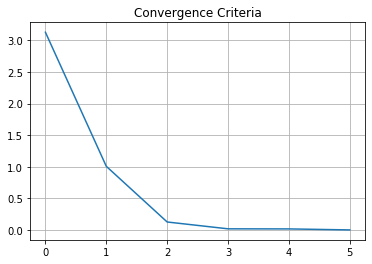

In [179]:
plt.plot(conv)
plt.title("Convergence Criteria")
plt.grid(True)
plt.show()

## Ex 3

In [181]:
centroid2, conv, class_ = kMean(X2, 5)
print(centroid2)

[[0.42143588 0.93274523]
 [0.6818377  1.01614398]
 [0.48031738 1.00299667]
 [0.59842583 0.73998318]
 [1.04801139 1.52003188]]
[[0.42030157 0.96805749]
 [0.82584023 0.79530467]
 [0.68923066 1.46246535]
 [0.51642911 0.46086225]
 [1.04791726 1.53352844]]


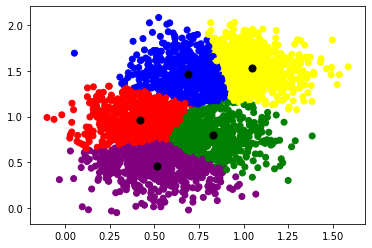

In [185]:

plt.scatter(X2[:,0], X2[:,1], c=class_, cmap=matplotlib.colors.ListedColormap(colors2))
plt.scatter(centroid2[:,0], centroid2[:,1], c='black', s=50)
plt.show()

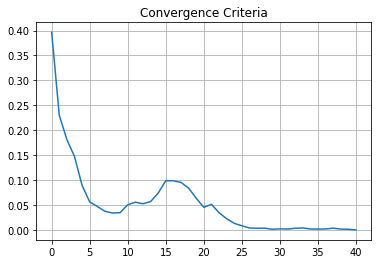

In [159]:
plt.plot(conv)
plt.title("Convergence Criteria")
plt.grid(True)
plt.show()